Dimensionality = (60, 3)


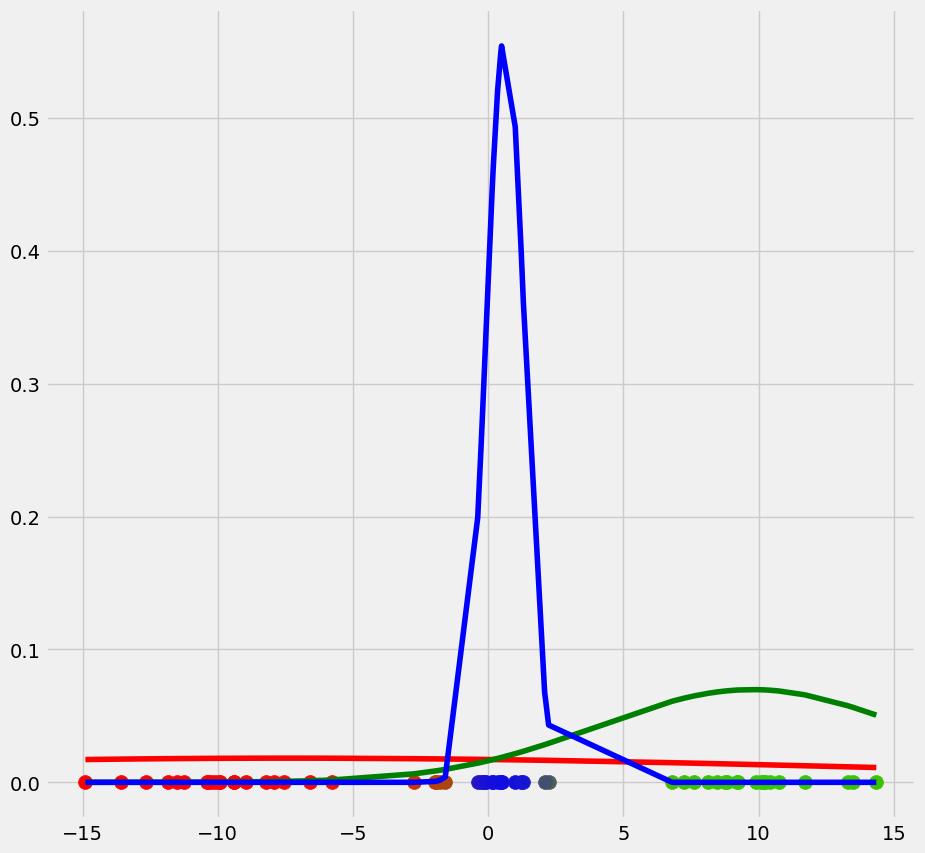

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)

X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above


"""
E-Step
"""

##Create the array r with dimensionality nxK
r = np.zeros((len(X_tot),3))  

print('Dimensionality','=',np.shape(r))


##Instantiate the random gaussians"""
##the parameters are initial guesses

gauss_1 = norm(loc=-5,scale=5) 
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)

"""Instantiate the random pi_c"""
pi = np.array([1/3,1/3,1/3]) # We expect to have three clusters 



for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                          # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians


##Normalize the probabilities such that each row of r sums to 1 and weight it by pi_c == the fraction of points belonging to cluster c

for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])



"""M-Step"""


"""calculate m_c"""
m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:,c]) ##total number of points in cluster c
    m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
    
    

    
"""calculate pi_c"""
pi_c = []
for m in m_c:
    pi_c.append(m/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c
    

"""calculate mu_c"""
mu_c = np.sum(X_tot.reshape(len(X_tot),1)*r,axis=0)/m_c


"""calculate var_c"""
var_c = []

for c in range(len(r[0])):
    var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(X_tot.reshape(len(X_tot),1)-mu_c[c])).T,(X_tot.reshape(len(X_tot),1)-mu_c[c])))

    
"""Update the gaussians"""

gauss_1 = norm(loc=mu_c[0],scale=var_c[0]) 
gauss_2 = norm(loc=mu_c[1],scale=var_c[1])
gauss_3 = norm(loc=mu_c[2],scale=var_c[2])
    
    

"""update r"""

"""
Probability for each datapoint x_i to belong to gaussian g 
"""
# Mind that we use the new pi_c here
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi_c):
    r[:,c] = p*g.pdf(X_tot) 
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi_c)*np.sum(r,axis=1)[i])


"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)



for i in range(len(r)):
    ax0.scatter(X_tot[i],0,color=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue

        
"""Plot the gaussians"""

for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort(X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,color=c)
        
        
        
plt.show()

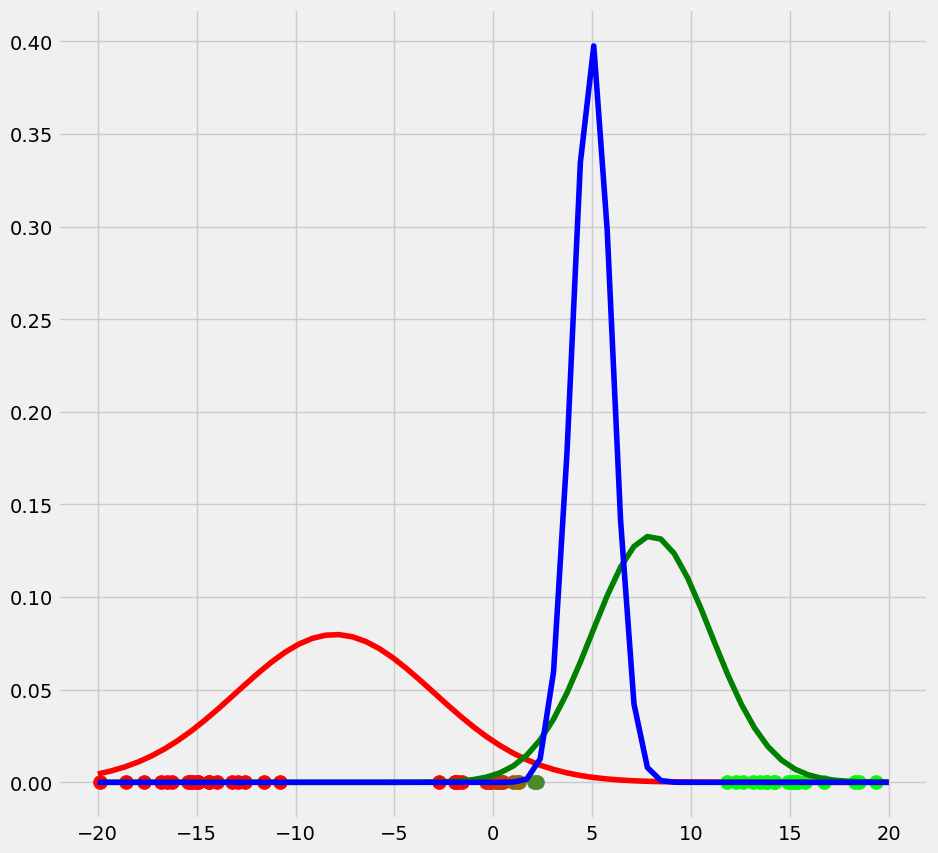

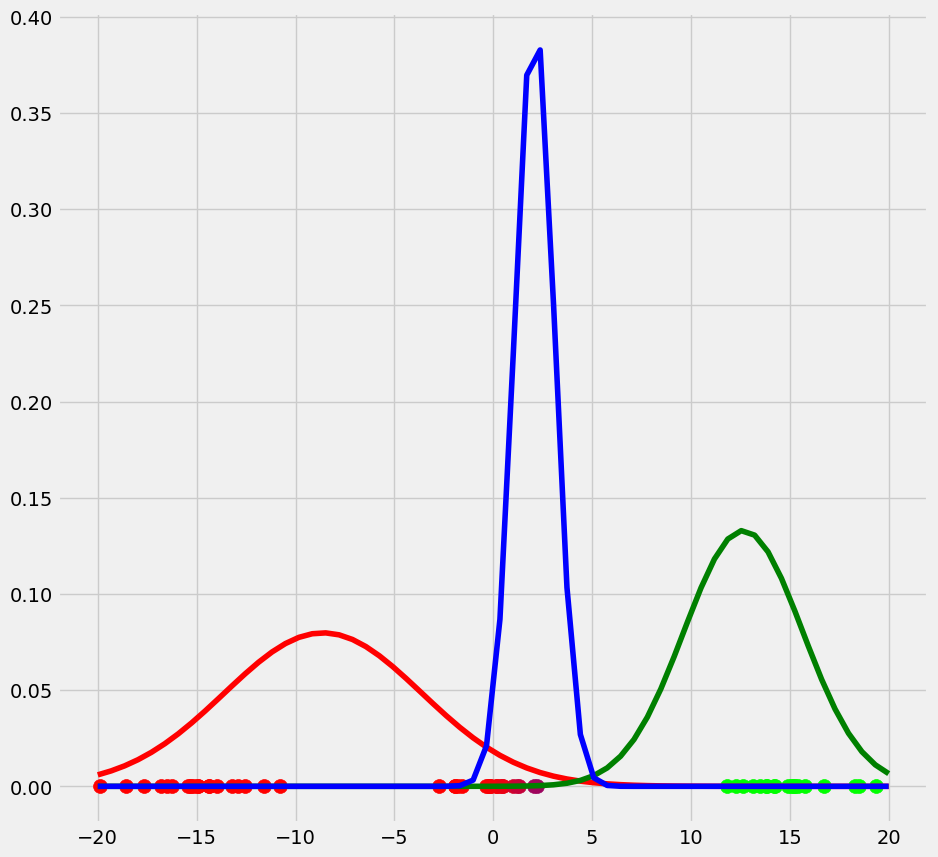

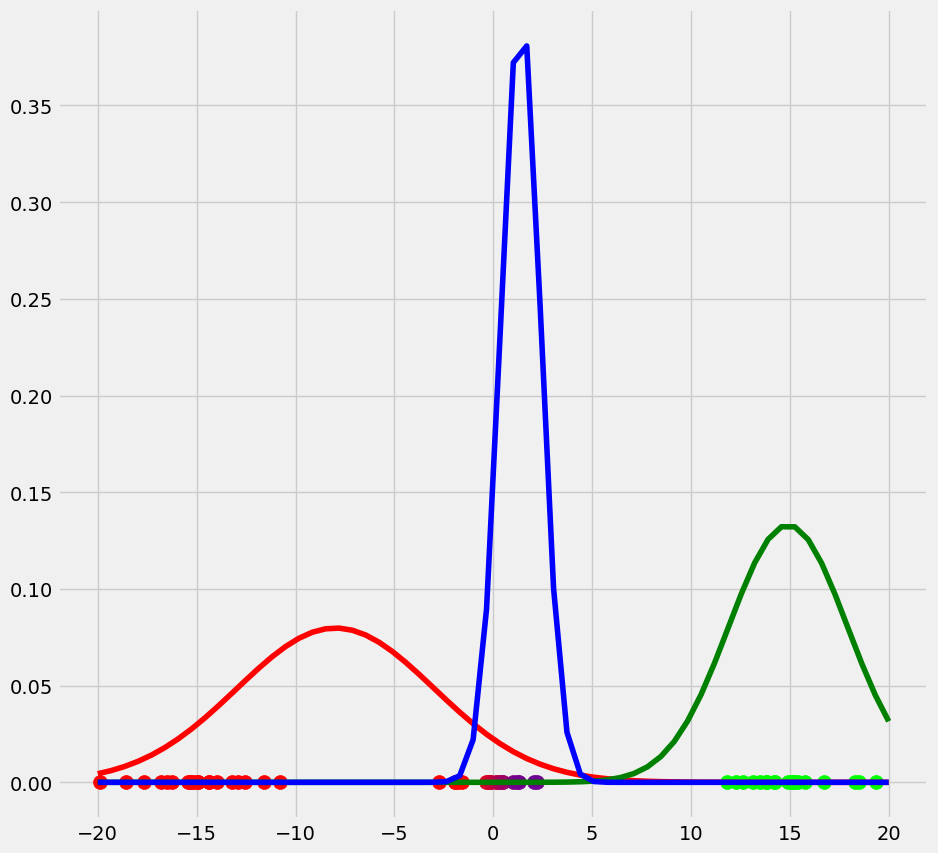

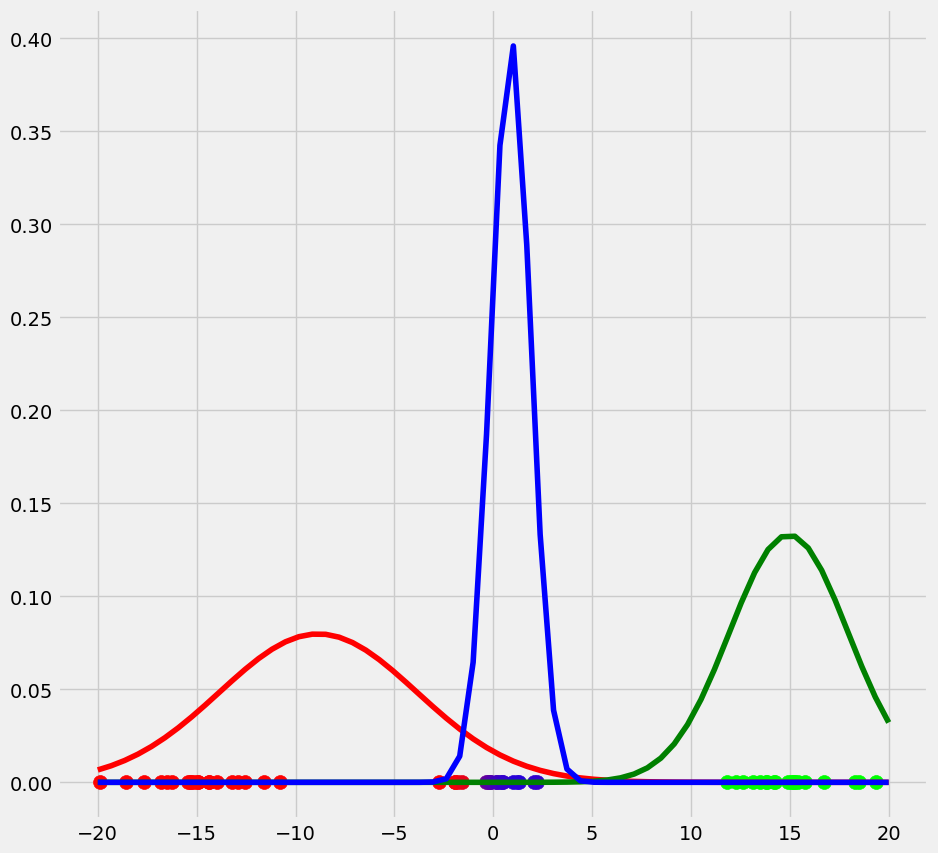

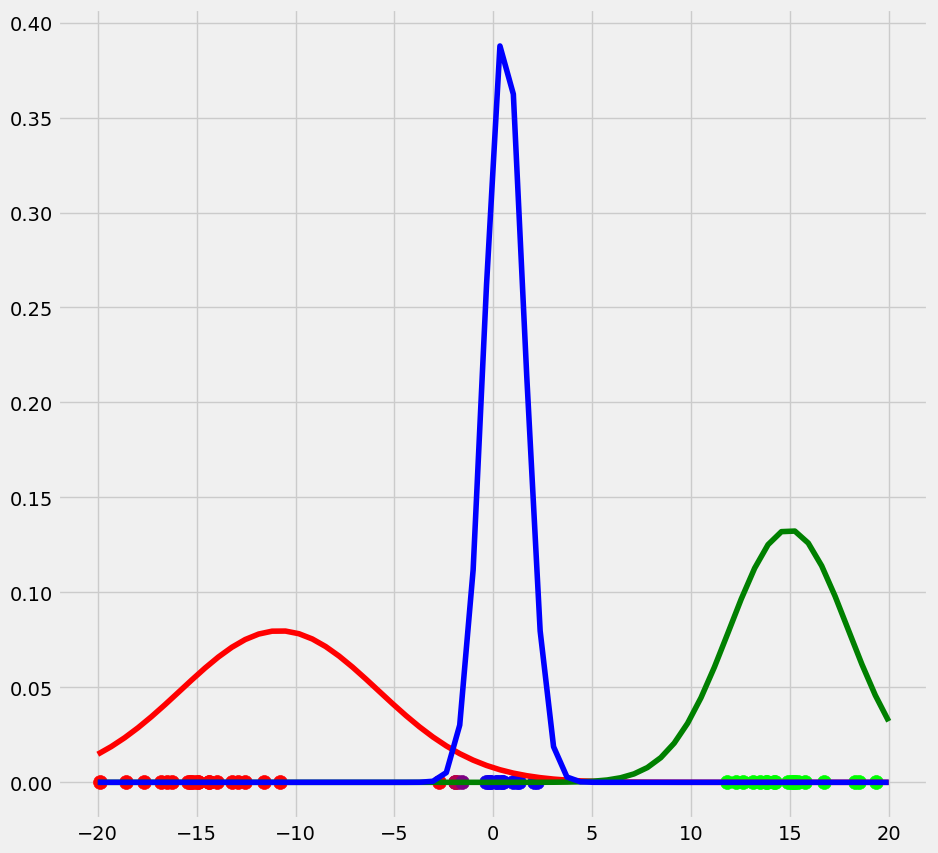

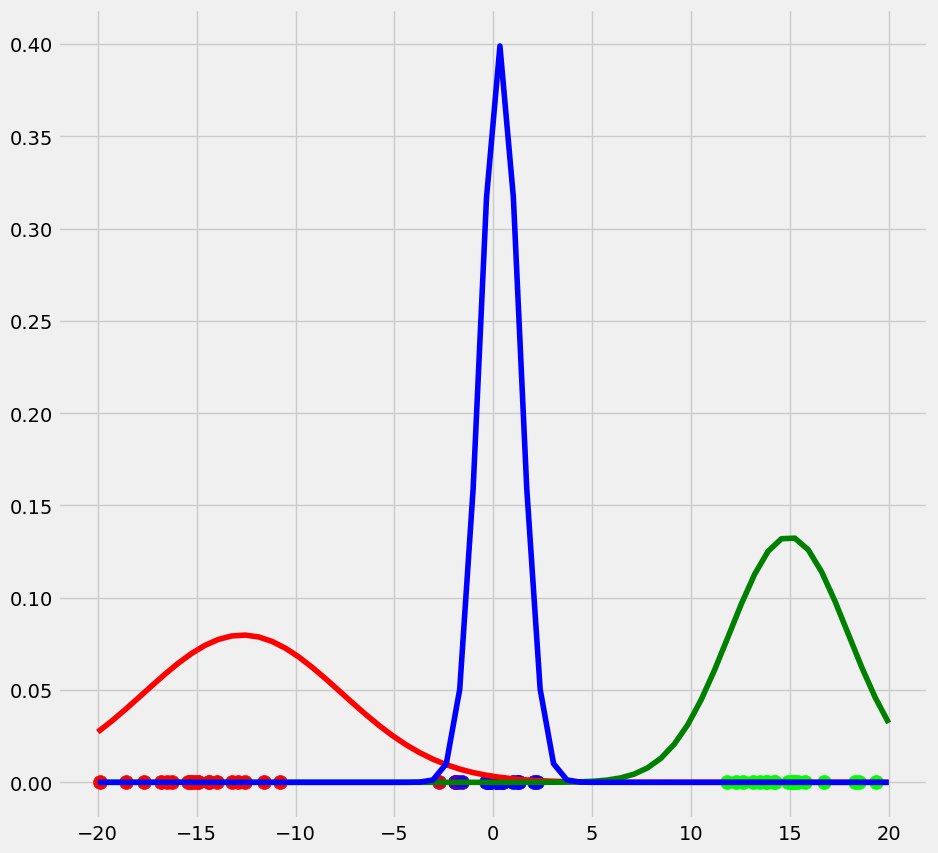

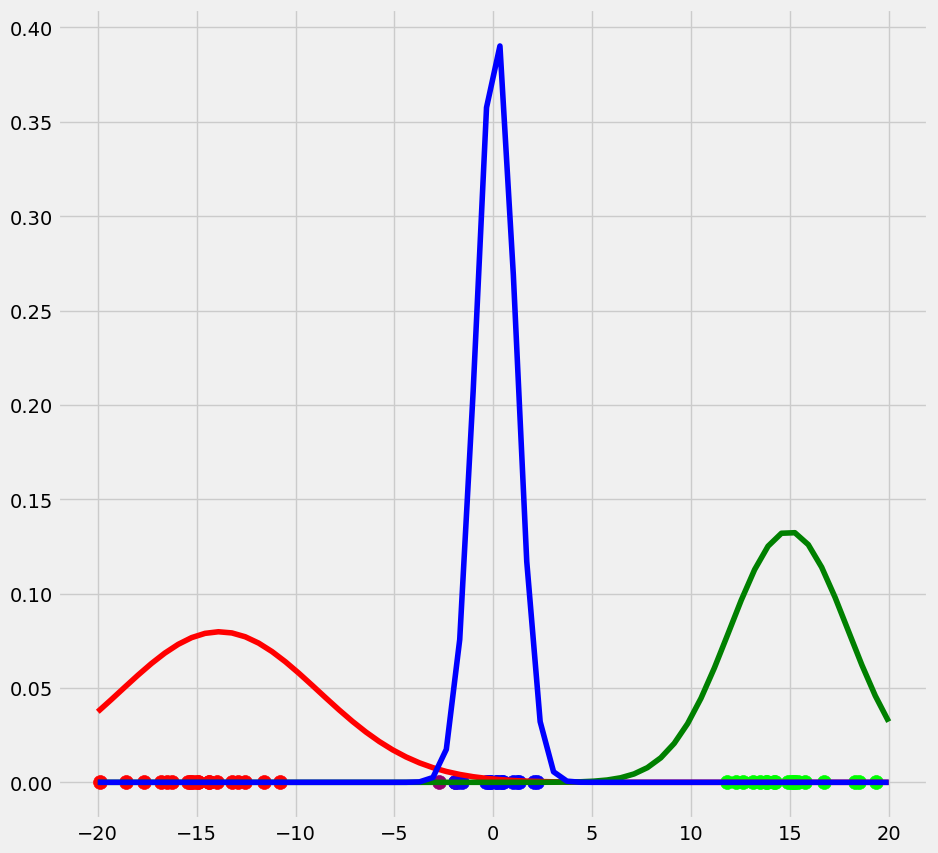

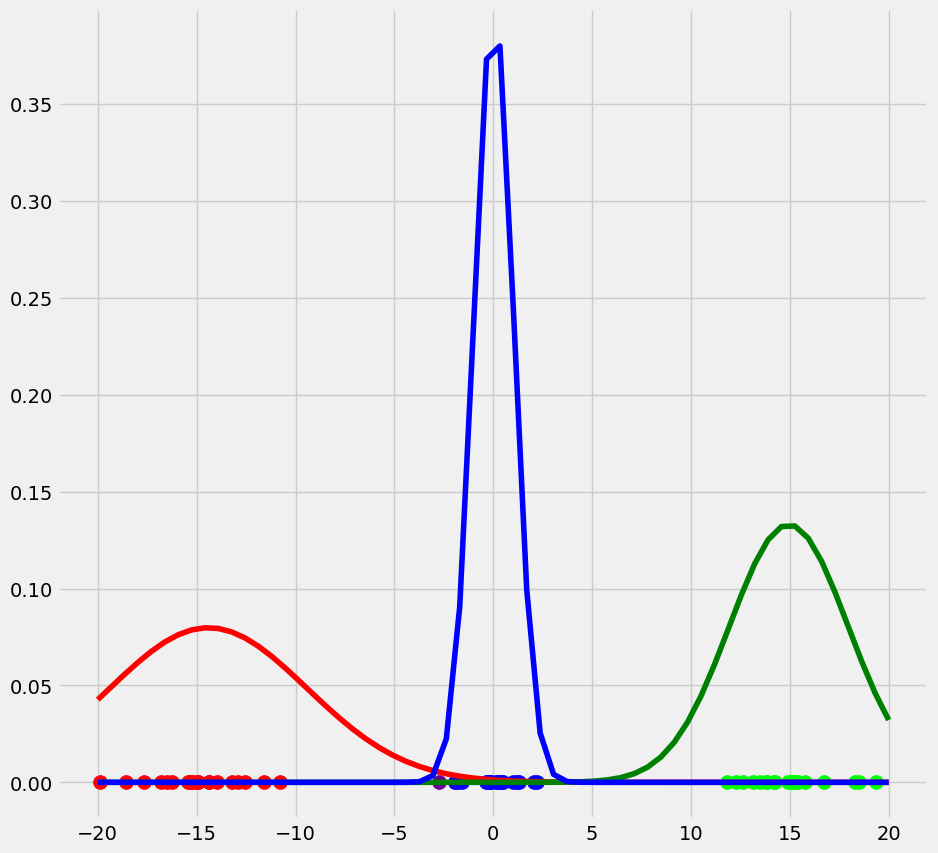

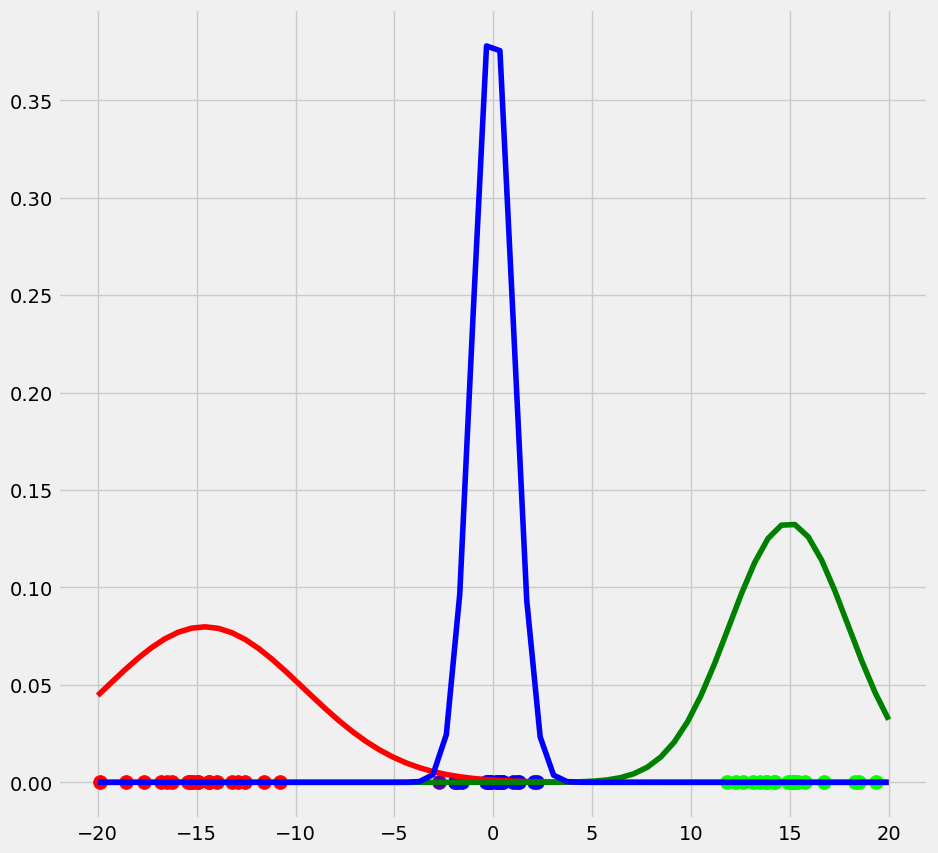

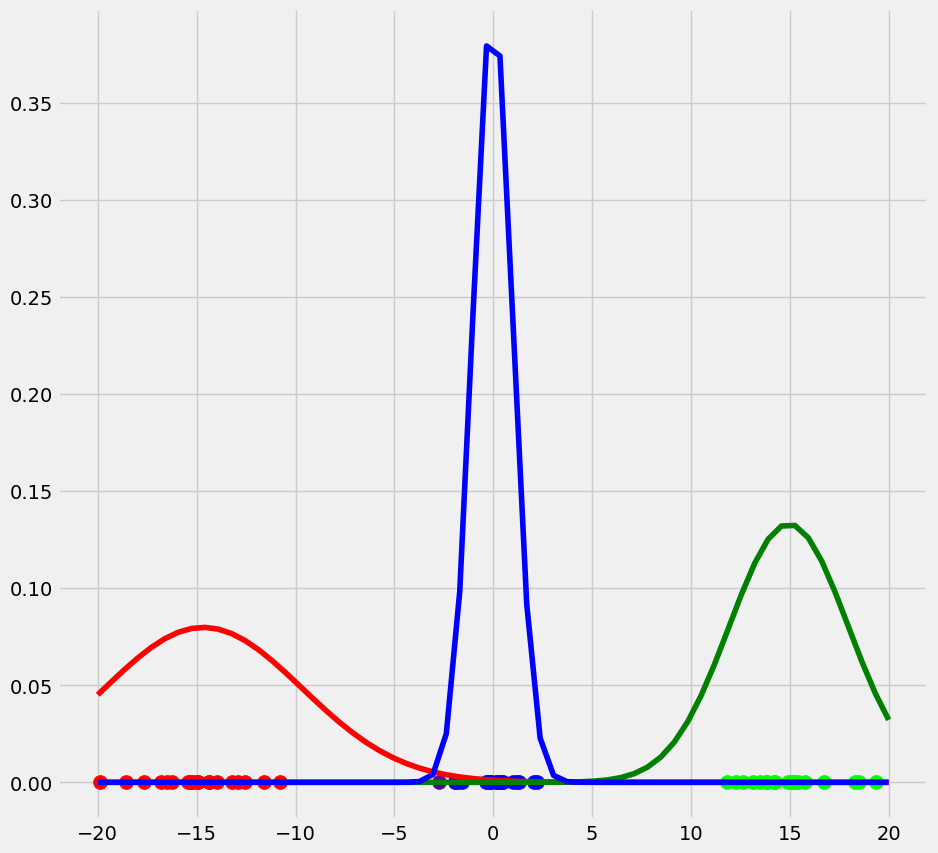

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)


X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+15 # Create data cluster 1
X1 = X*np.random.rand(len(X))-15 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

class GM1D:

    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
  

    def run(self):
        

        """
        Instantiate the random mu, pi and var
        """
        self.mu = [-8,8,5]
        self.pi = [1/3,1/3,1/3]
        self.var = [5,3,1]
        
        
        
        """
        E-Step
        """
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(X_tot),3))  

  
            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                                      # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
            """
            Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
            cluster c
            """
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])


            """Plot the data"""

            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)


            for i in range(len(r)):
                ax0.scatter(self.X[i],0,color=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 


            """Plot the gaussians"""


            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
                ax0.plot(np.linspace(-20,20,num=60),g,color=c)
        
            
            
            """M-Step"""
    

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c

            """calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

            """calculate mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c


            """calculate var_c"""
            var_c = []

            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))


            plt.savefig("1.png")
            plt.show()
    

GM1D = GM1D(X_tot,10)
GM1D.run()